# Feature creation within a Pipeline

This notebook shows the creation of new features with Feature-engine and the scikit-learn pipeline.

In [1]:
# for data processing and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

In [2]:
# Load dataset

filename = r'C:\Users\devanshu.tayal\Downloads\adult\adult.data'
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country','income']
data = pd.read_csv(filename, sep=',', names=col_names)

print(data.shape)

data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# inspect data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']
discrete = [var for var in data.columns if data[var].dtype != 'O']

In [5]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [6]:
discrete

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

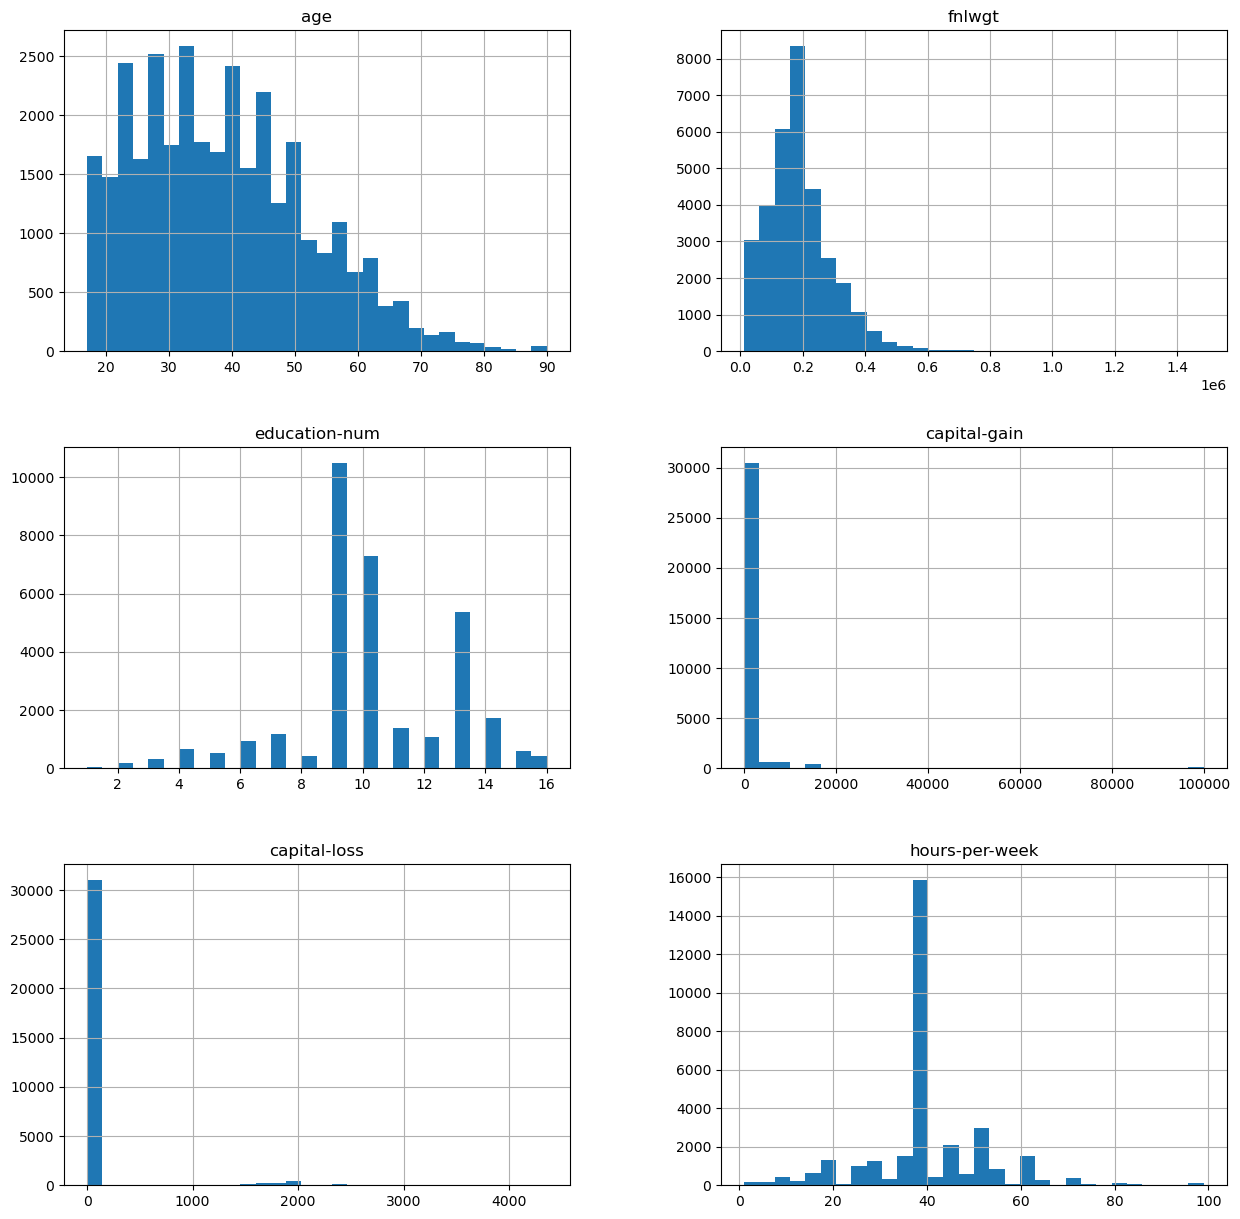

In [7]:
# histograms of discrete variables

data[discrete].hist(bins=30, figsize=(15,15))
plt.show()

C:\Users\devanshu.tayal\AppData\Local\Temp\ipykernel_12980\2497660637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, y=var, kind="count", palette="ch:.25")
C:\Users\devanshu.tayal\AppData\Local\Temp\ipykernel_12980\2497660637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, y=var, kind="count", palette="ch:.25")
C:\Users\devanshu.tayal\AppData\Local\Temp\ipykernel_12980\2497660637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, y=var, kind="count", palette="ch:.25")
C:\Users\devanshu.tayal\AppData

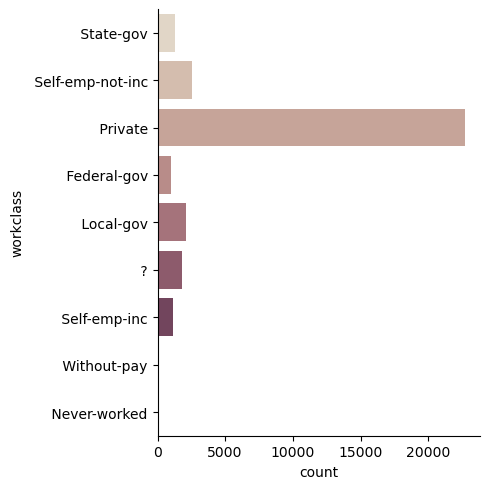

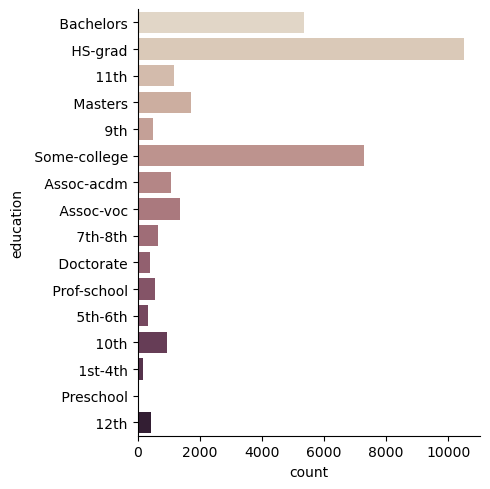

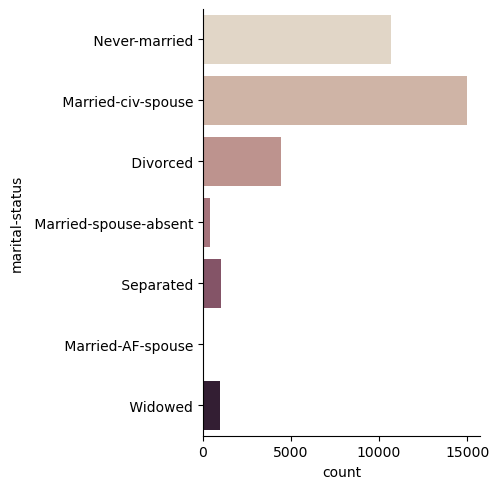

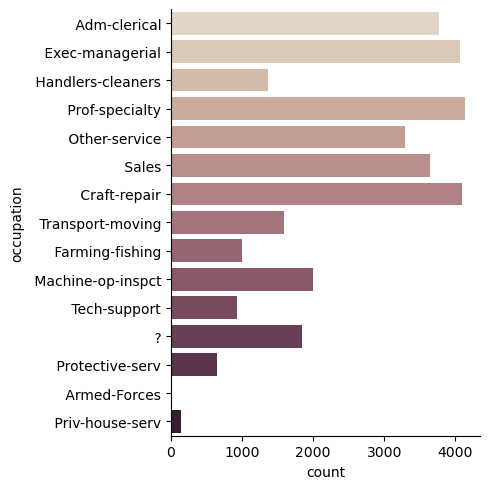

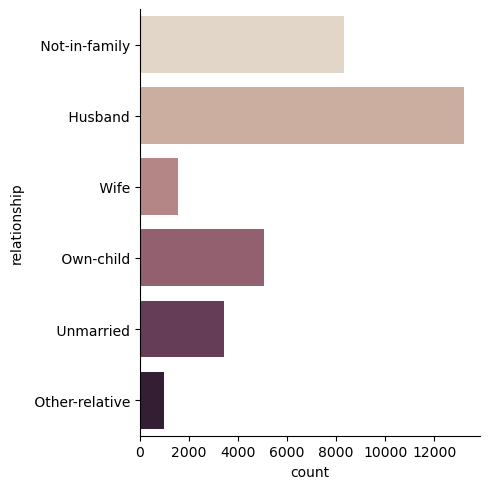

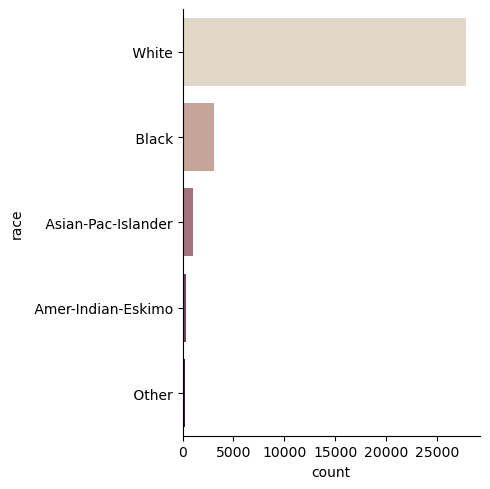

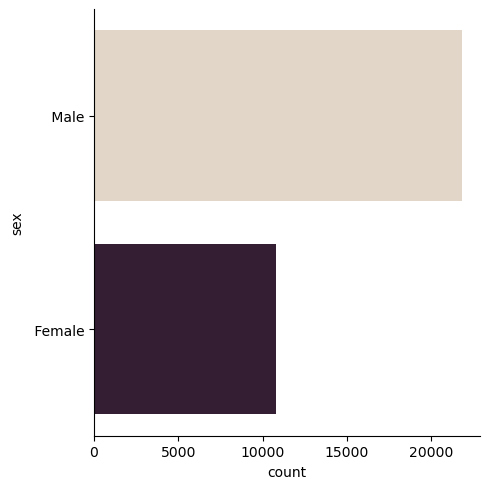

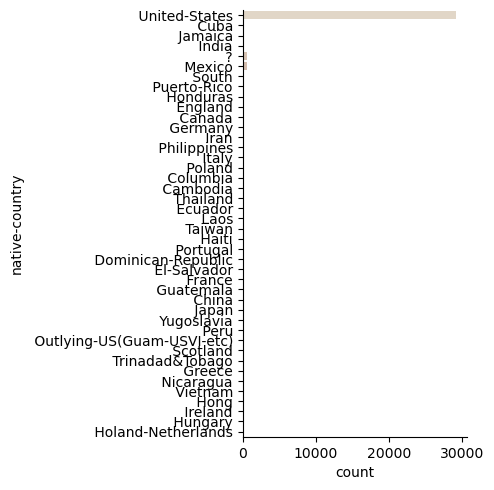

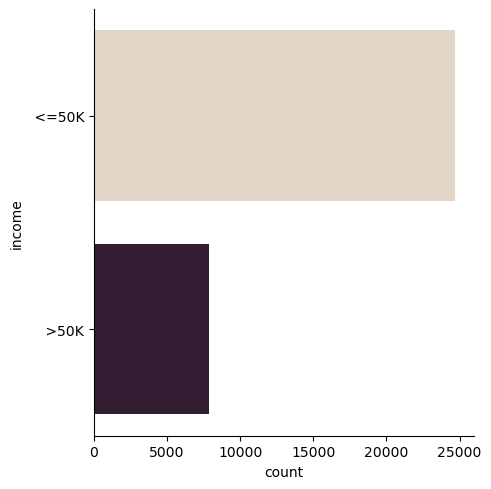

In [8]:
# plot of categoricals

for var in categorical:
    sns.catplot(data=data, y=var, kind="count", palette="ch:.25")

In [9]:
# transform the income value (target variable)

In [10]:
data['income'] = data.income.apply(lambda x: x.replace("<=50K","0"))

In [11]:
data['income'] = data.income.apply(lambda x: x.replace(">50K","1"))

In [12]:
data['income'] = data.income.apply(lambda x: int(x))

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [14]:
# split training data into train and test

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['income'], axis=1),
    data['income'],
    test_size=0.1,
    random_state=42)

X_train.shape, X_test.shape

((29304, 14), (3257, 14))

In [15]:
# remove 'income' from the categorical list

categorical.pop()

'income'

In [16]:
# build the pipeline

income_pipe = Pipeline([

    # === rare label encoding =========
    ('rare_label_enc', ce.RareLabelEncoder(tol=0.1, n_categories=1)),

    # === encoding categories ===
    ('categorical_enc', ce.DecisionTreeEncoder(regression=False,
        param_grid={'max_depth': [1, 2,3]},
        random_state=2909,
        variables=categorical)),

    # === discretisation =====
    ('discretisation', dsc.DecisionTreeDiscretiser(regression=False,
        param_grid={'max_depth': [1, 2, 3]},
        random_state=2909,
        variables=discrete)),

    # classification
    ('gbm', GradientBoostingClassifier(random_state=42))
])

In [17]:
# fit the pipeline

income_pipe.fit(X_train, y_train)

Pipeline(steps=[('rare_label_enc', RareLabelEncoder(n_categories=1, tol=0.1)),
                ('categorical_enc',
                 DecisionTreeEncoder(param_grid={'max_depth': [1, 2, 3]},
                                     random_state=2909, regression=False,
                                     variables=['workclass', 'education',
                                                'marital-status', 'occupation',
                                                'relationship', 'race', 'sex',
                                                'native-country'])),
                ('discretisation',
                 DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2, 3]},
                                         random_state=2909, regression=False,
                                         variables=['age', 'fnlwgt',
                                                    'education-num',
                                                    'capital-gain',
                                                    'capital-loss',
                                                    'hours-per-week'])),
                ('gbm', GradientBoostingClassifier(random_state=42))])

In [18]:
# extract predictions

X_train_preds = income_pipe.predict(X_train)
X_test_preds = income_pipe.predict(X_test)

In [19]:
# show model performance:

print('train accuracy: {}'.format(accuracy_score(y_train, X_train_preds)))
print()
print('test accuracy: {}'.format(accuracy_score(y_test, X_test_preds)))

train accuracy: 0.8593707343707344

test accuracy: 0.8609149524101934
